In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from feature_engine.creation import CyclicalFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
sb.set()

In [143]:
data=pd.read_excel(r"C:\Users\Admin\Desktop\Time_Series_Practice\AirQualityUCI.xlsx", usecols=['PT08.S1(CO)', 'RH', 'Date', 'Time'])
data['Date_Time'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'].astype(str))
data=data.drop(columns=['Date', 'Time'], axis=1)
data

PT08.S1(CO)         RH           Date_Time
0         1360.00  48.875001 2004-03-10 18:00:00
1         1292.25  47.700000 2004-03-10 19:00:00
2         1402.00  53.975000 2004-03-10 20:00:00
3         1375.50  60.000000 2004-03-10 21:00:00
4         1272.25  59.575001 2004-03-10 22:00:00
...           ...        ...                 ...
9352      1314.25  29.250000 2005-04-04 10:00:00
9353      1162.50  23.725000 2005-04-04 11:00:00
9354      1142.00  18.350000 2005-04-04 12:00:00
9355      1002.50  13.550000 2005-04-04 13:00:00
9356      1070.75  13.125000 2005-04-04 14:00:00

[9357 rows x 3 columns]

In [144]:
data = data.rename(columns={'PT08.S1(CO)': 'CO_Sensor'})
data

CO_Sensor         RH           Date_Time
0       1360.00  48.875001 2004-03-10 18:00:00
1       1292.25  47.700000 2004-03-10 19:00:00
2       1402.00  53.975000 2004-03-10 20:00:00
3       1375.50  60.000000 2004-03-10 21:00:00
4       1272.25  59.575001 2004-03-10 22:00:00
...         ...        ...                 ...
9352    1314.25  29.250000 2005-04-04 10:00:00
9353    1162.50  23.725000 2005-04-04 11:00:00
9354    1142.00  18.350000 2005-04-04 12:00:00
9355    1002.50  13.550000 2005-04-04 13:00:00
9356    1070.75  13.125000 2005-04-04 14:00:00

[9357 rows x 3 columns]

In [145]:
data.isna().sum()

CO_Sensor    0
RH           0
Date_Time    0
dtype: int64

In [146]:
data.dtypes

CO_Sensor           float64
RH                  float64
Date_Time    datetime64[ns]
dtype: object

In [147]:
data.set_index("Date_Time", inplace=True)

In [148]:
data

CO_Sensor         RH
Date_Time                                
2004-03-10 18:00:00    1360.00  48.875001
2004-03-10 19:00:00    1292.25  47.700000
2004-03-10 20:00:00    1402.00  53.975000
2004-03-10 21:00:00    1375.50  60.000000
2004-03-10 22:00:00    1272.25  59.575001
...                        ...        ...
2005-04-04 10:00:00    1314.25  29.250000
2005-04-04 11:00:00    1162.50  23.725000
2005-04-04 12:00:00    1142.00  18.350000
2005-04-04 13:00:00    1002.50  13.550000
2005-04-04 14:00:00    1070.75  13.125000

[9357 rows x 2 columns]

In [149]:
data.index=pd.to_datetime(data.index)

In [150]:
data.index

DatetimeIndex(['2004-03-10 18:00:00', '2004-03-10 19:00:00',
               '2004-03-10 20:00:00', '2004-03-10 21:00:00',
               '2004-03-10 22:00:00', '2004-03-10 23:00:00',
               '2004-03-11 00:00:00', '2004-03-11 01:00:00',
               '2004-03-11 02:00:00', '2004-03-11 03:00:00',
               ...
               '2005-04-04 05:00:00', '2005-04-04 06:00:00',
               '2005-04-04 07:00:00', '2005-04-04 08:00:00',
               '2005-04-04 09:00:00', '2005-04-04 10:00:00',
               '2005-04-04 11:00:00', '2005-04-04 12:00:00',
               '2005-04-04 13:00:00', '2005-04-04 14:00:00'],
              dtype='datetime64[ns]', name='Date_Time', length=9357, freq=None)

In [151]:
data=data.loc['2004-04-04':'2005-04-04']

In [152]:
data.index.min()

Timestamp('2004-04-04 00:00:00')

In [153]:
data.index.max()

Timestamp('2005-04-04 14:00:00')

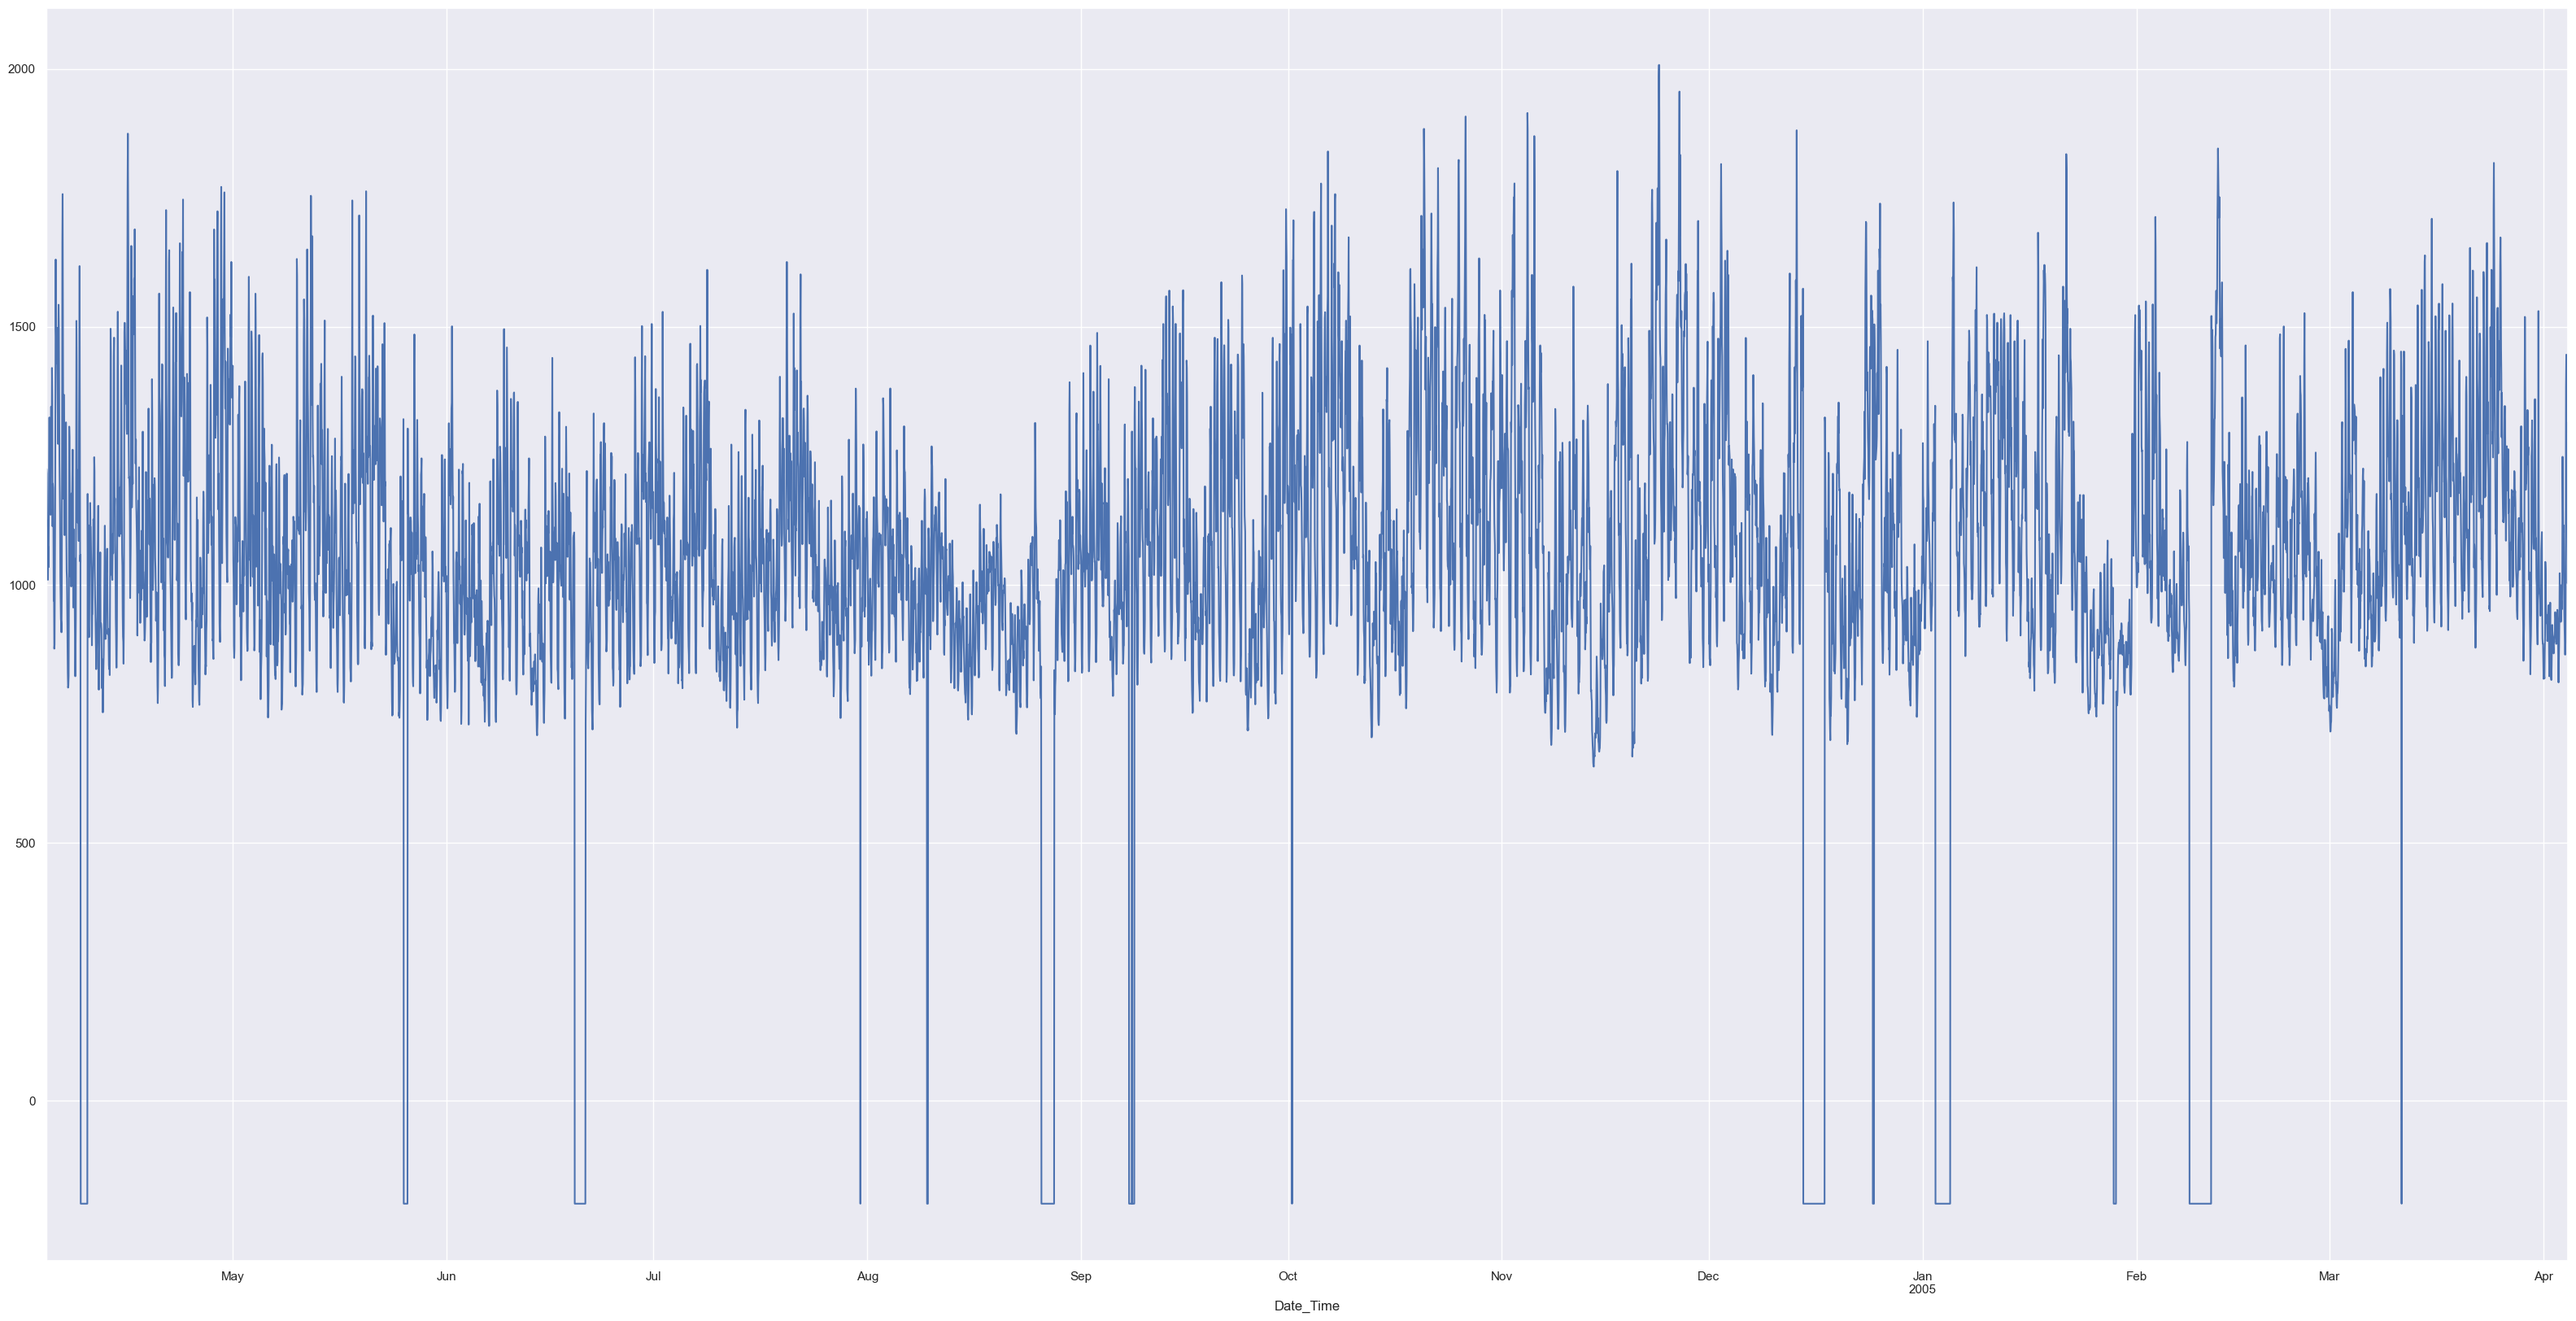

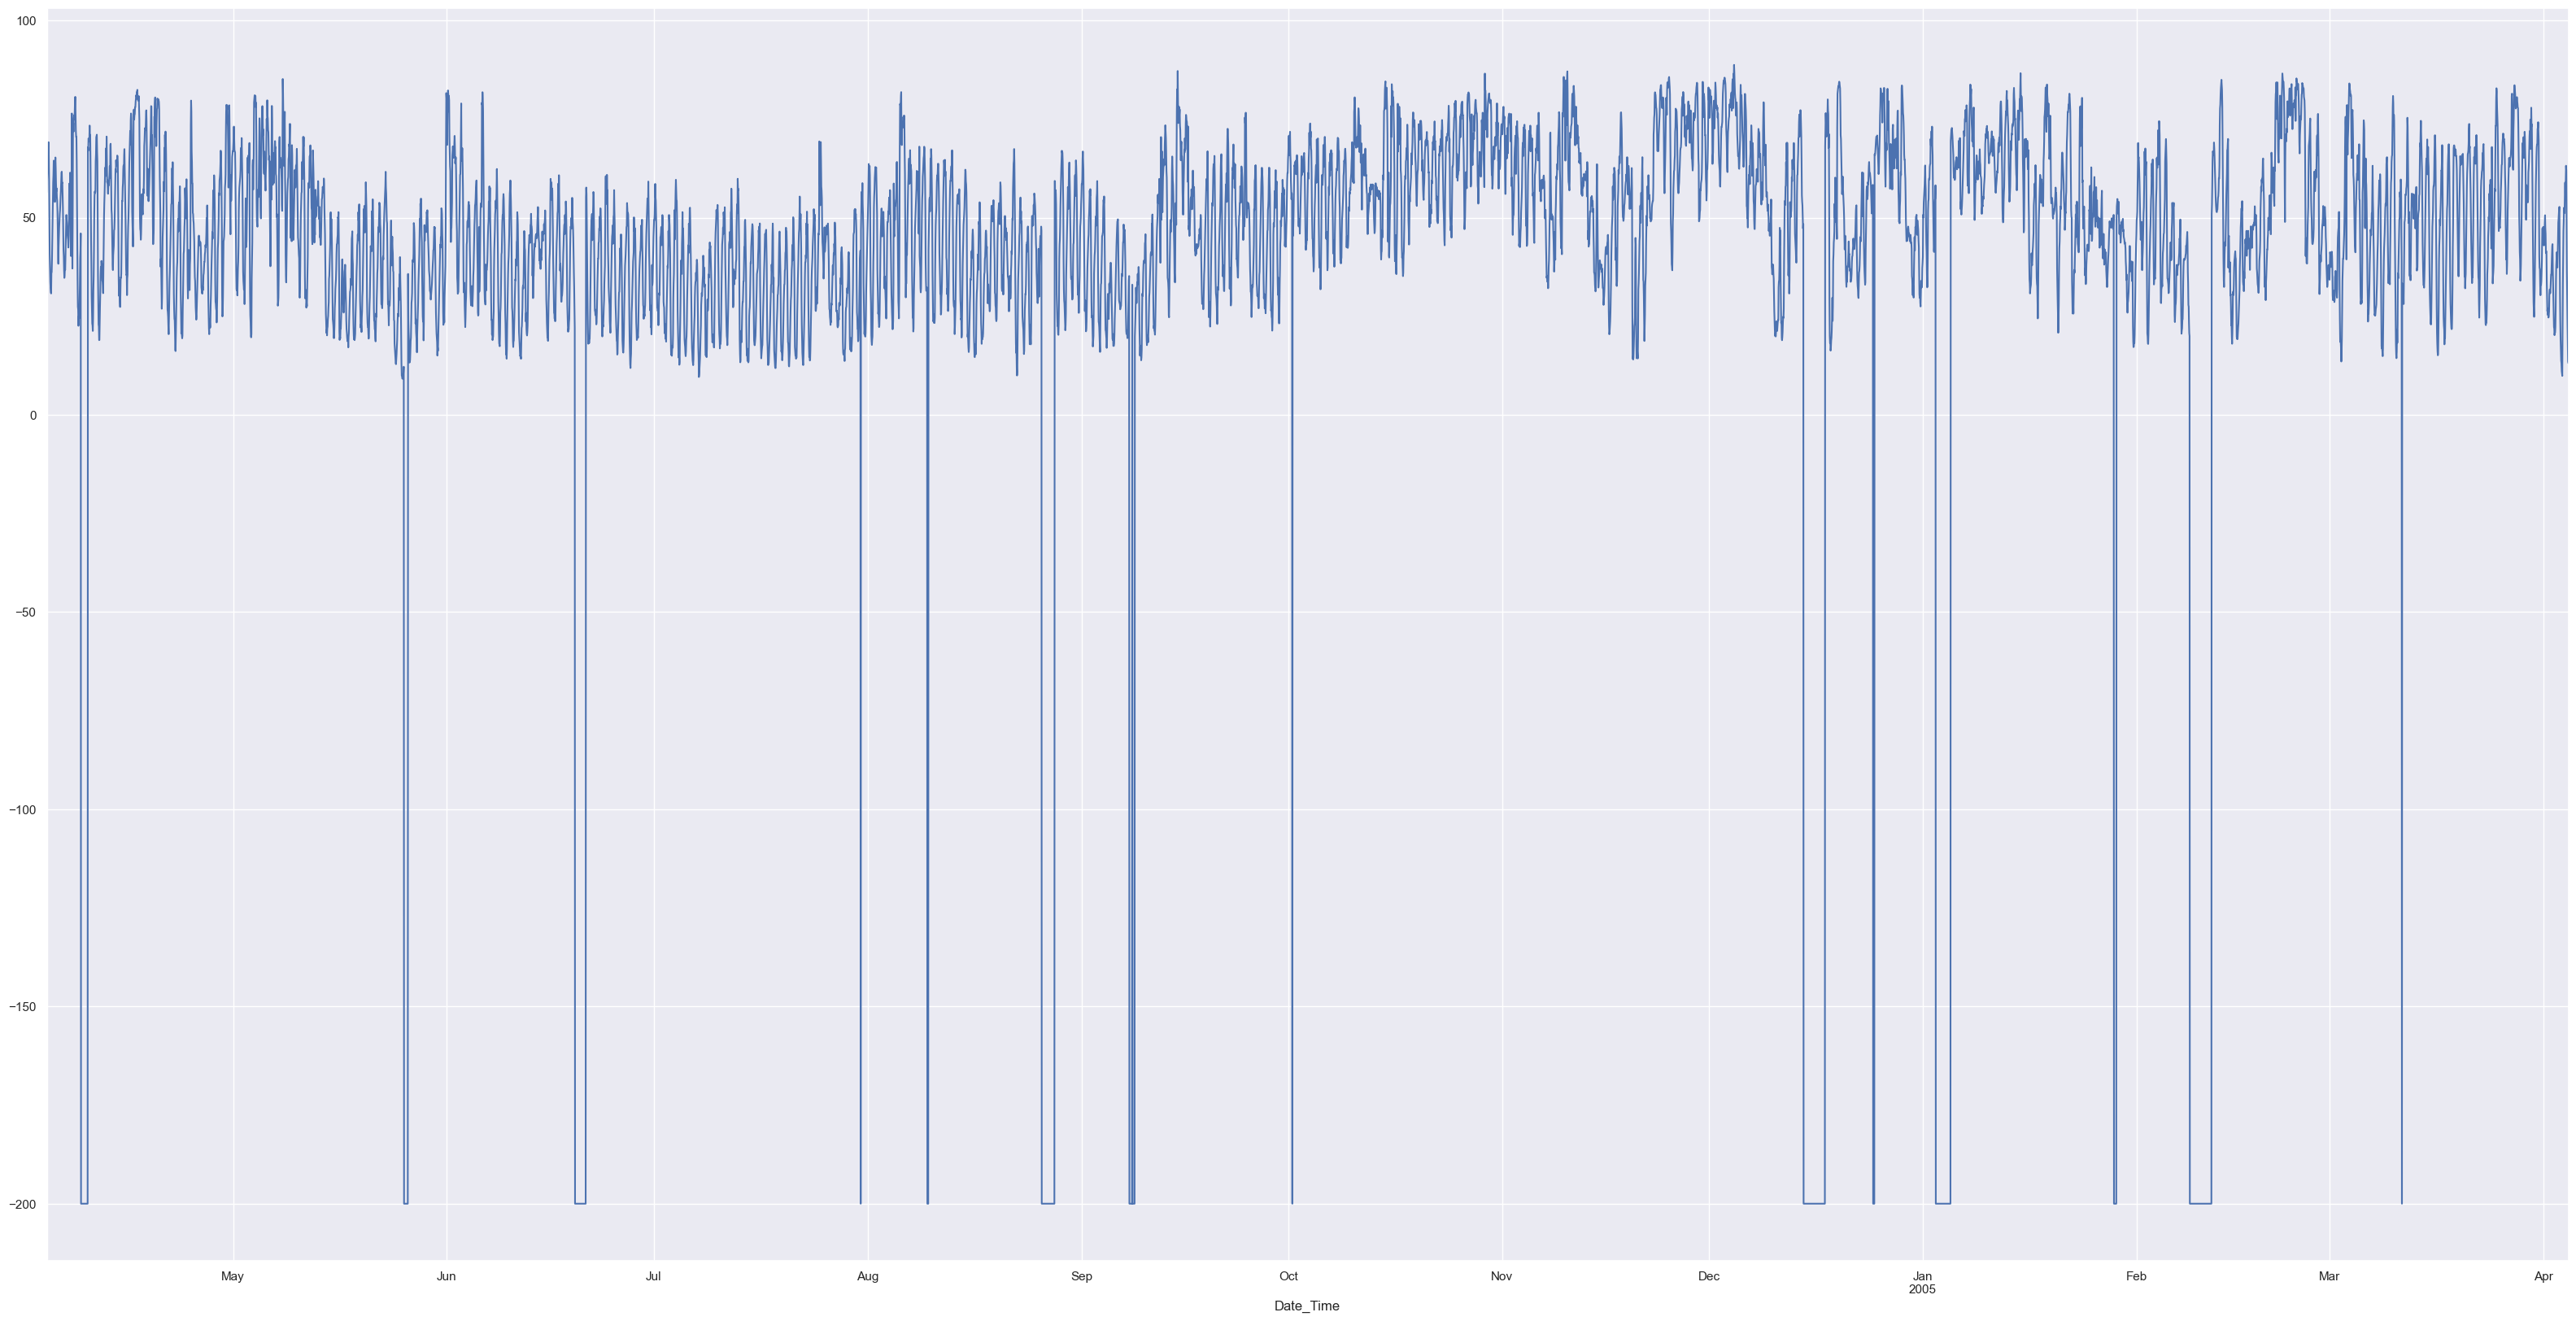

In [154]:
for var in ['CO_Sensor', 'RH']:
    
    data[var].plot(figsize=(40,20))
    
    plt.show()

In [155]:
data = data[(data["CO_Sensor"] >= 0) & (data["RH"] >= 0)]


In [156]:
data

CO_Sensor         RH
Date_Time                                
2004-04-04 00:00:00    1224.25  56.475000
2004-04-04 01:00:00    1215.25  59.200000
2004-04-04 02:00:00    1114.50  62.400001
2004-04-04 03:00:00    1123.50  64.950002
2004-04-04 04:00:00    1027.50  65.349998
...                        ...        ...
2005-04-04 10:00:00    1314.25  29.250000
2005-04-04 11:00:00    1162.50  23.725000
2005-04-04 12:00:00    1142.00  18.350000
2005-04-04 13:00:00    1002.50  13.550000
2005-04-04 14:00:00    1070.75  13.125000

[8412 rows x 2 columns]

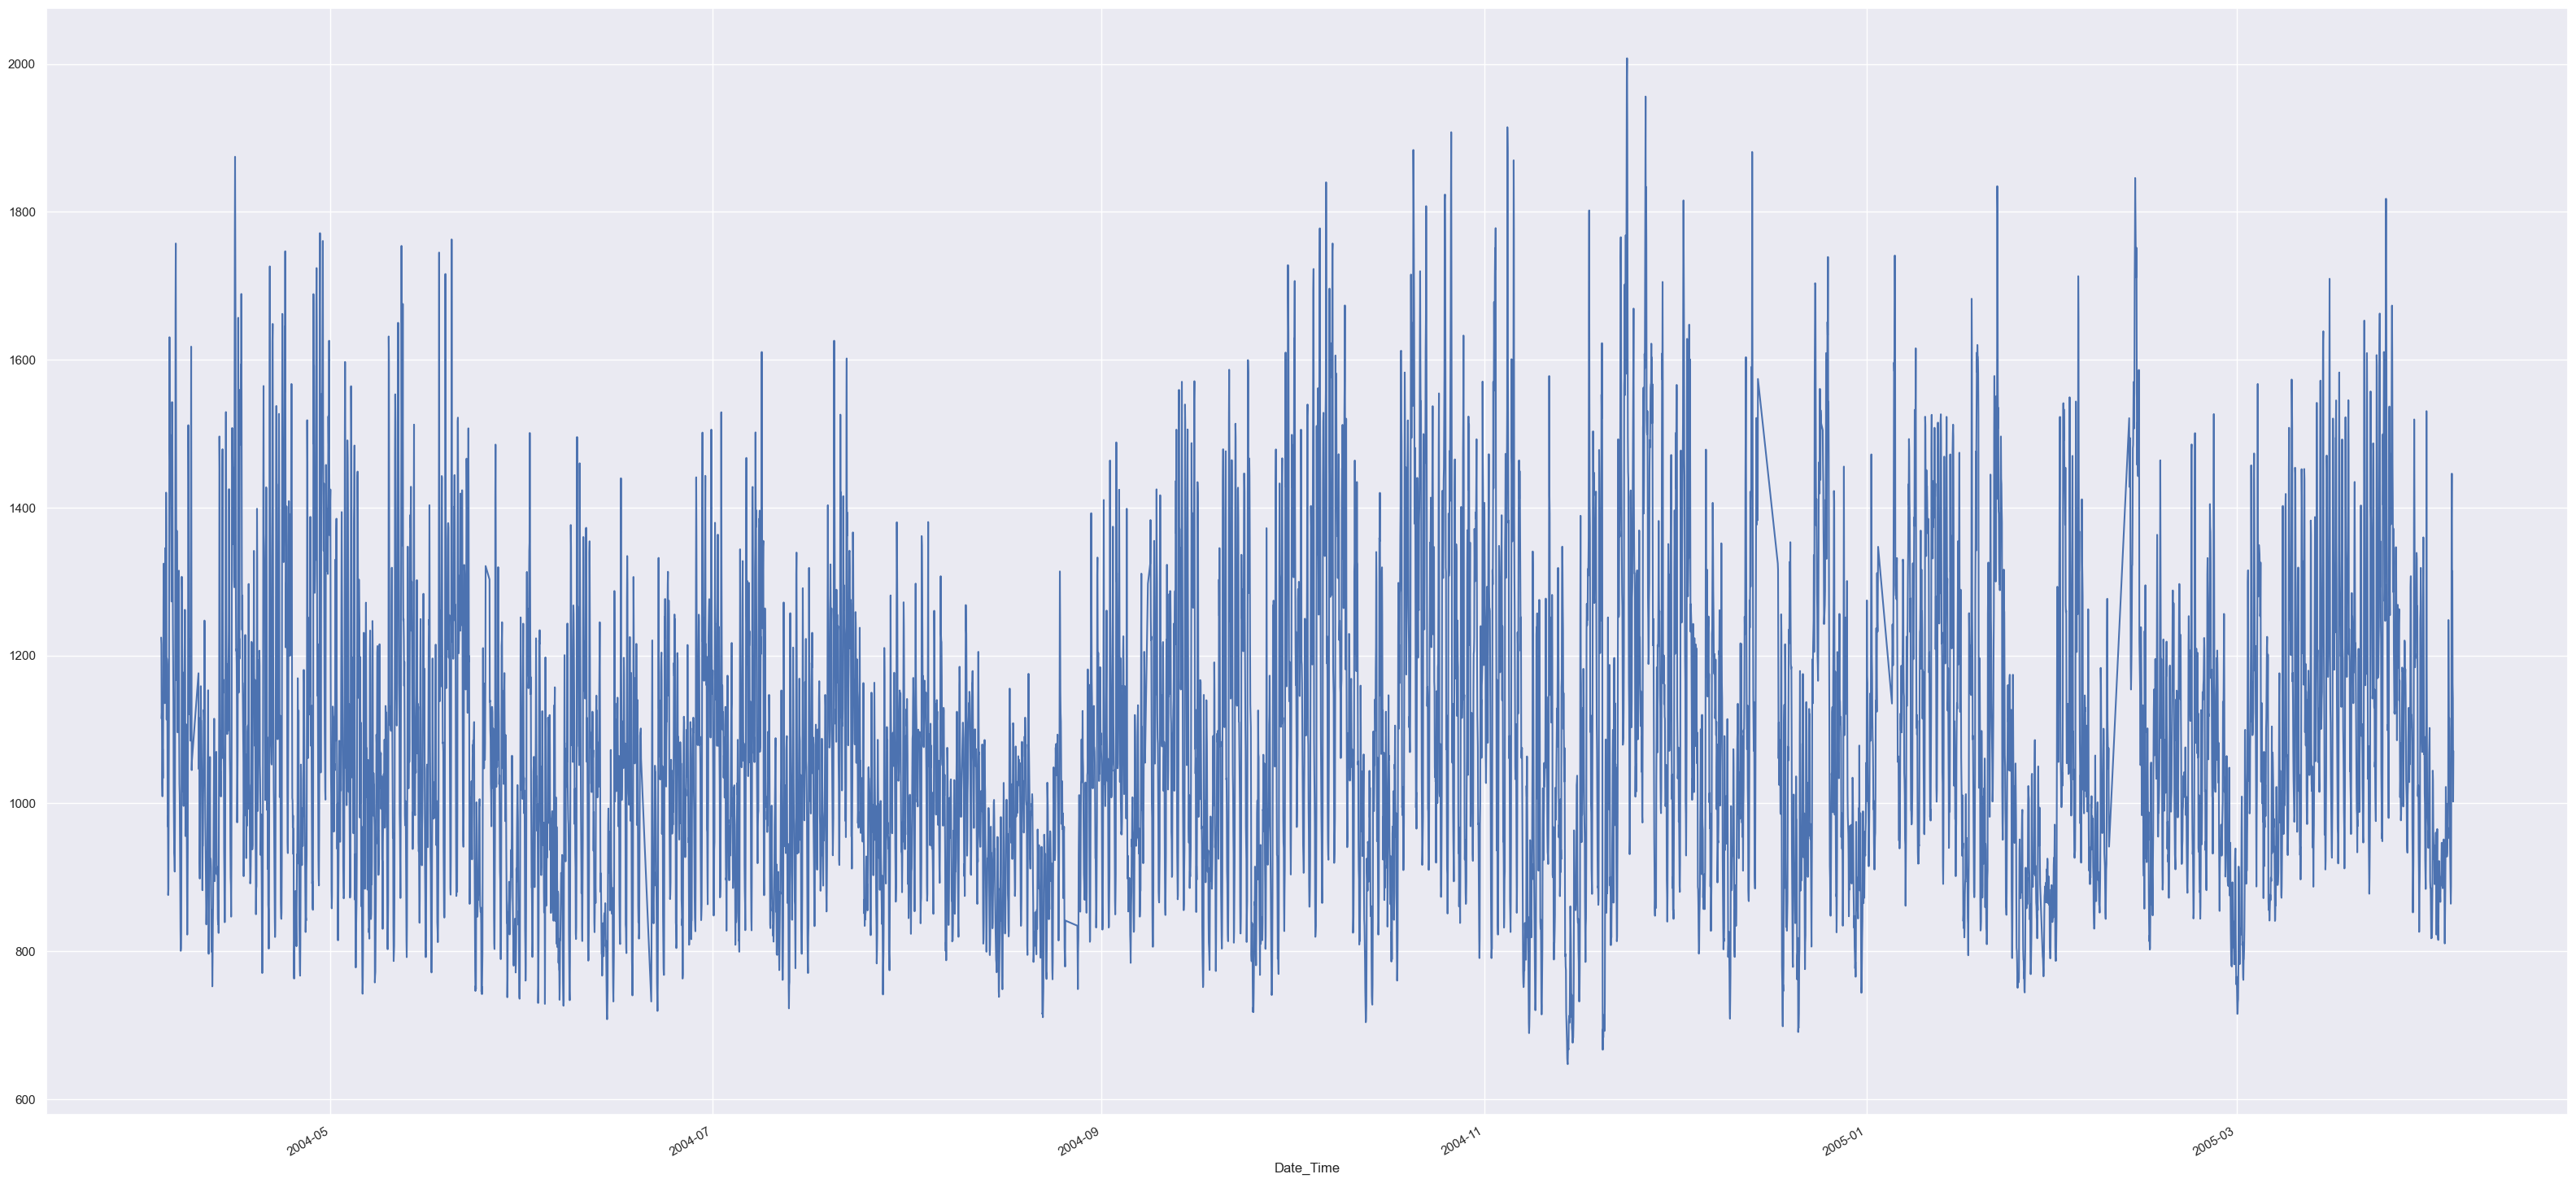

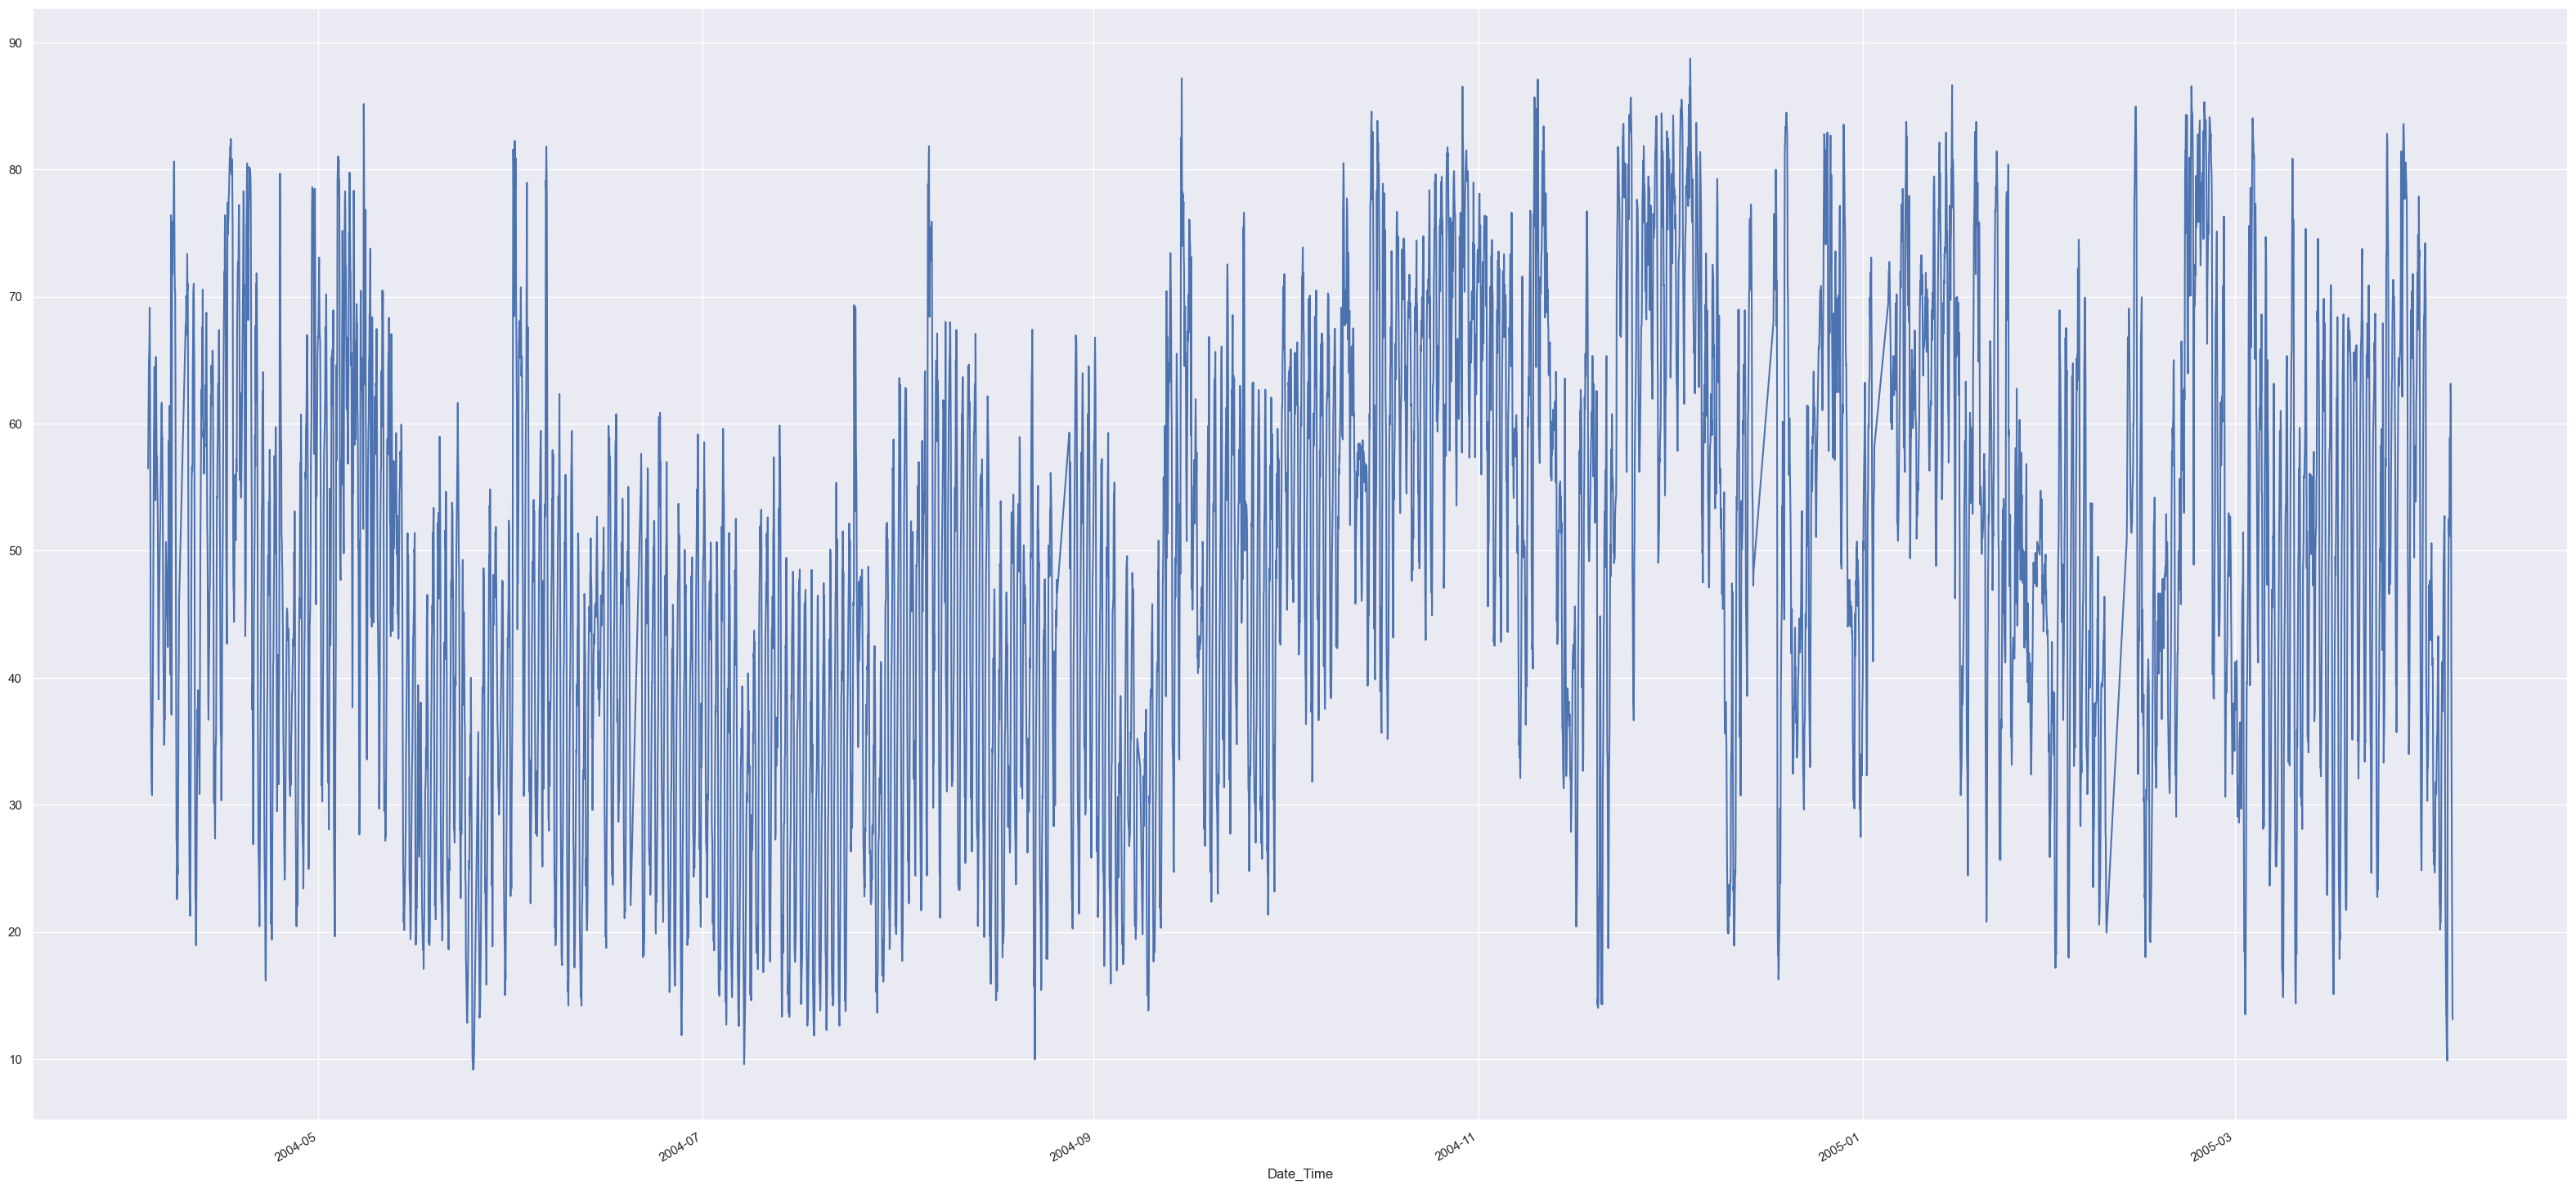

In [157]:
for var in ['CO_Sensor', 'RH']:
    
    data[var].plot(figsize=(40,20))
    
    plt.show()

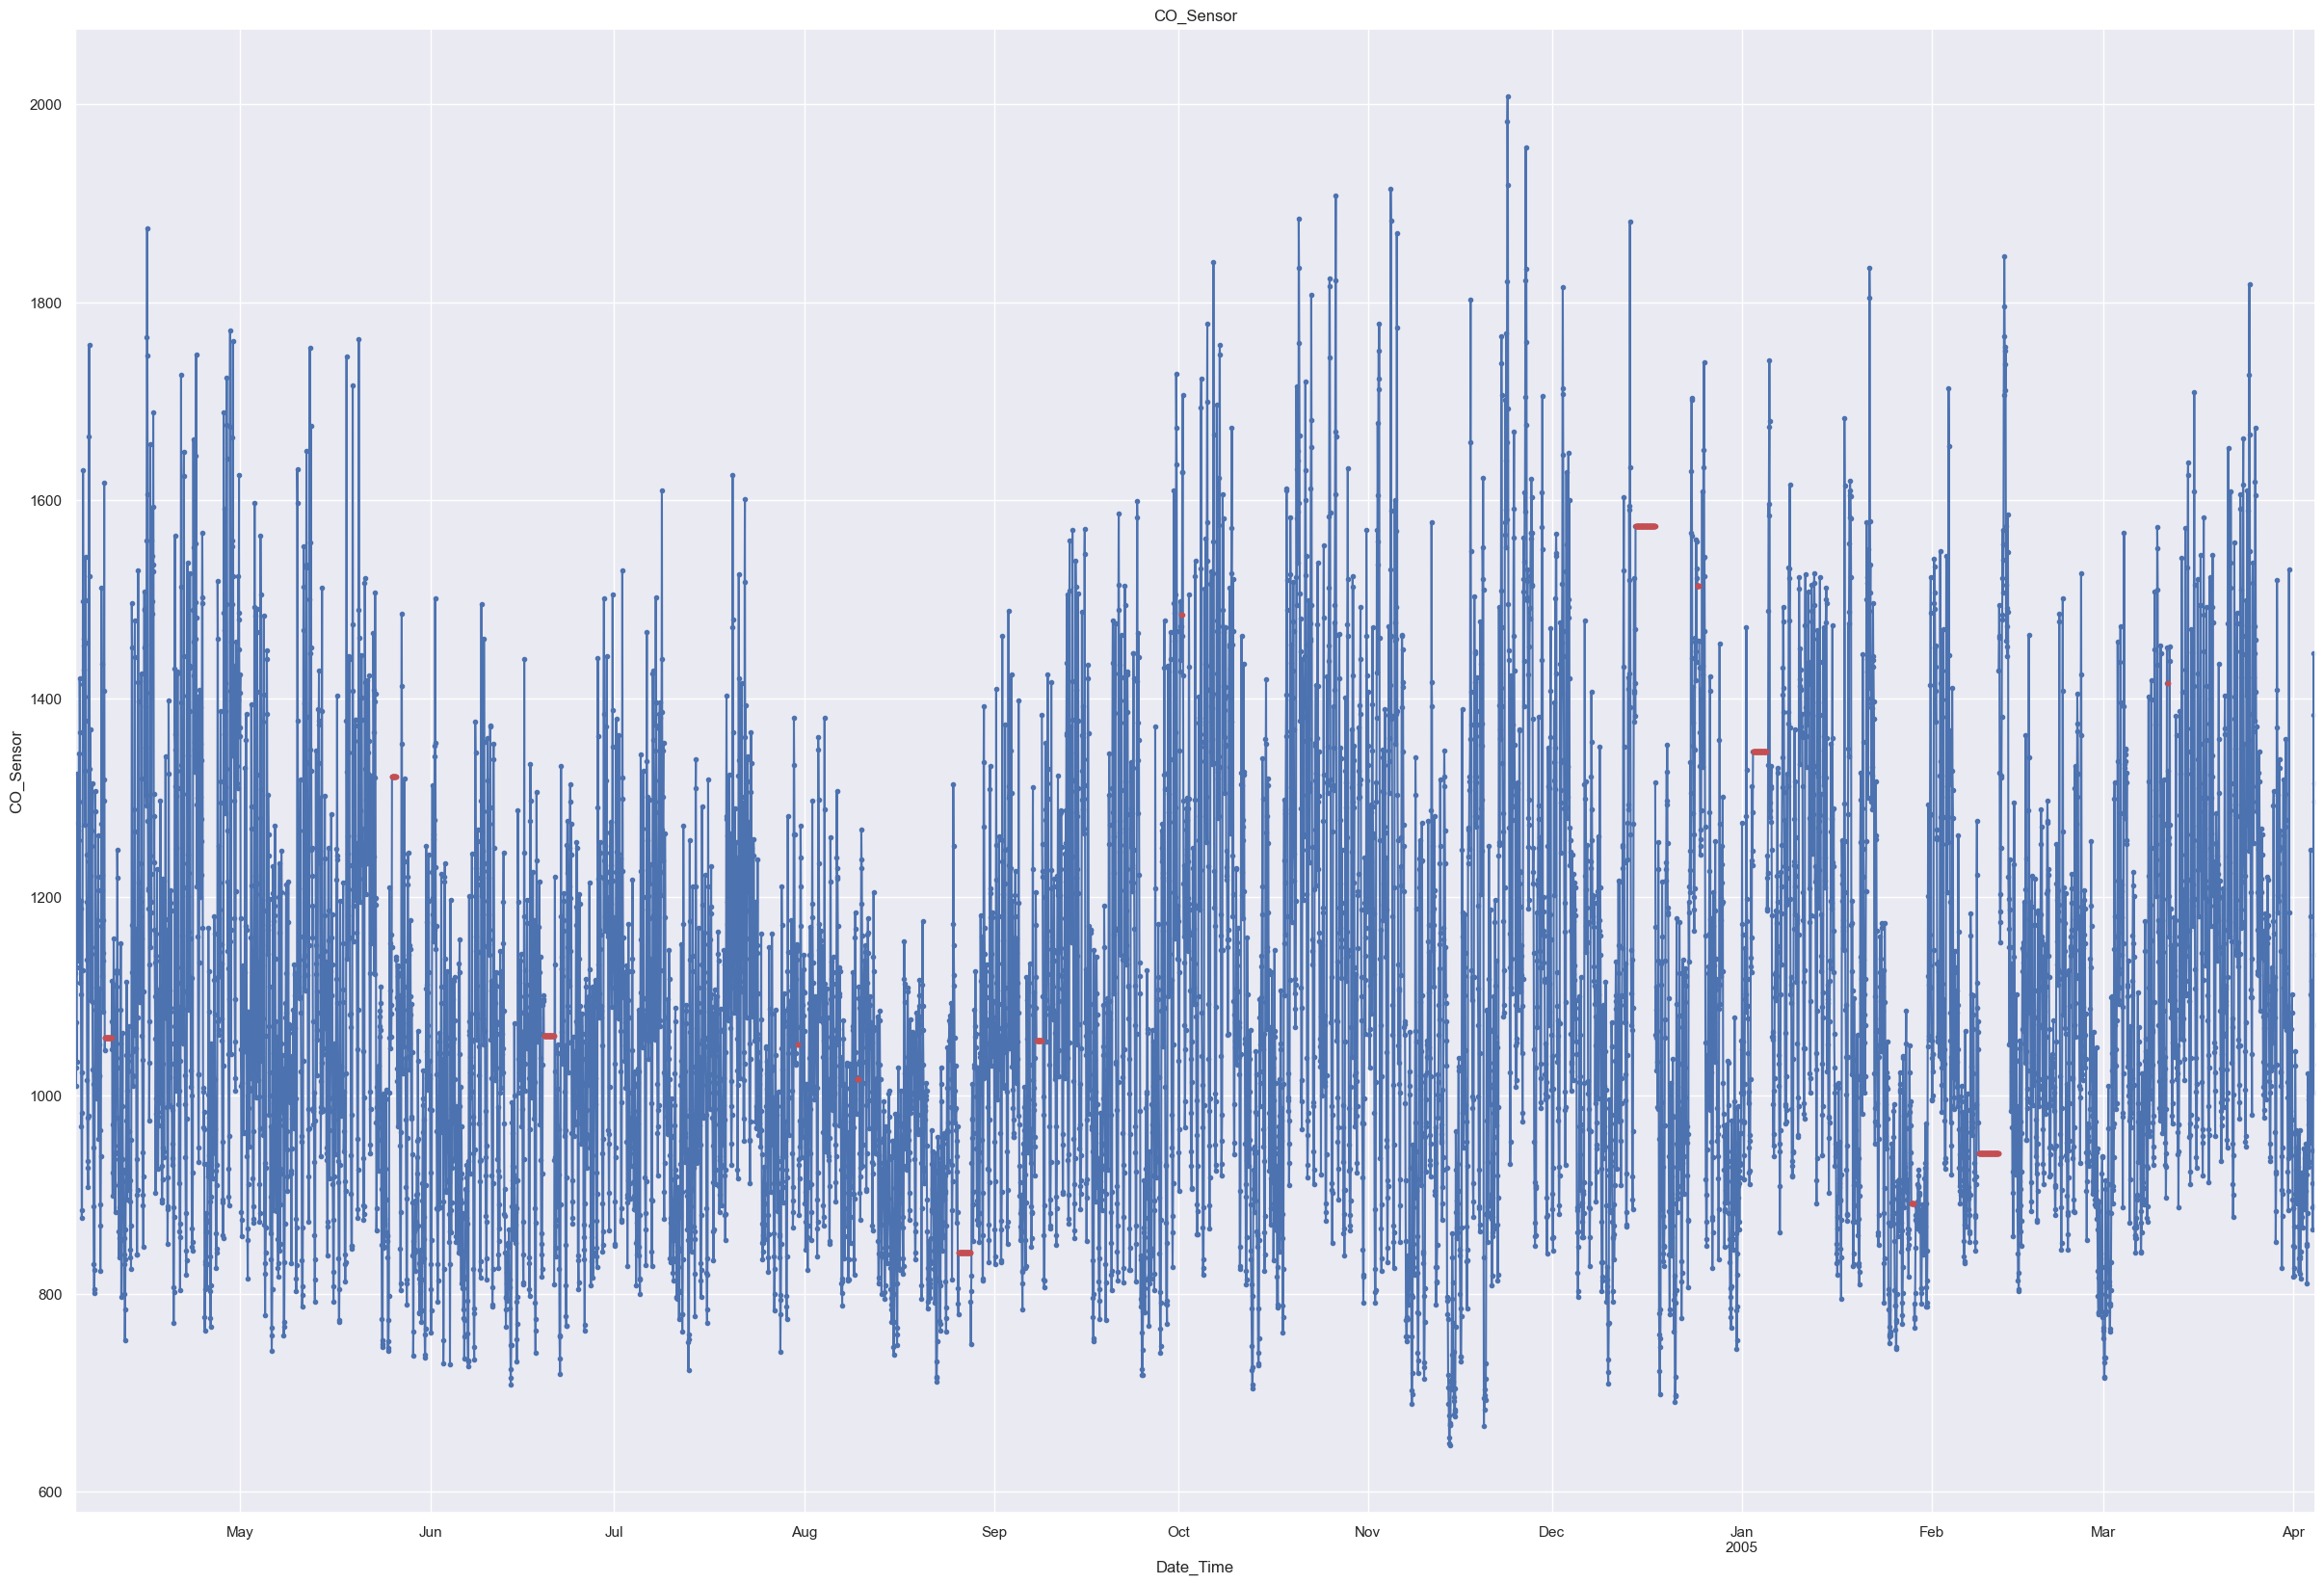

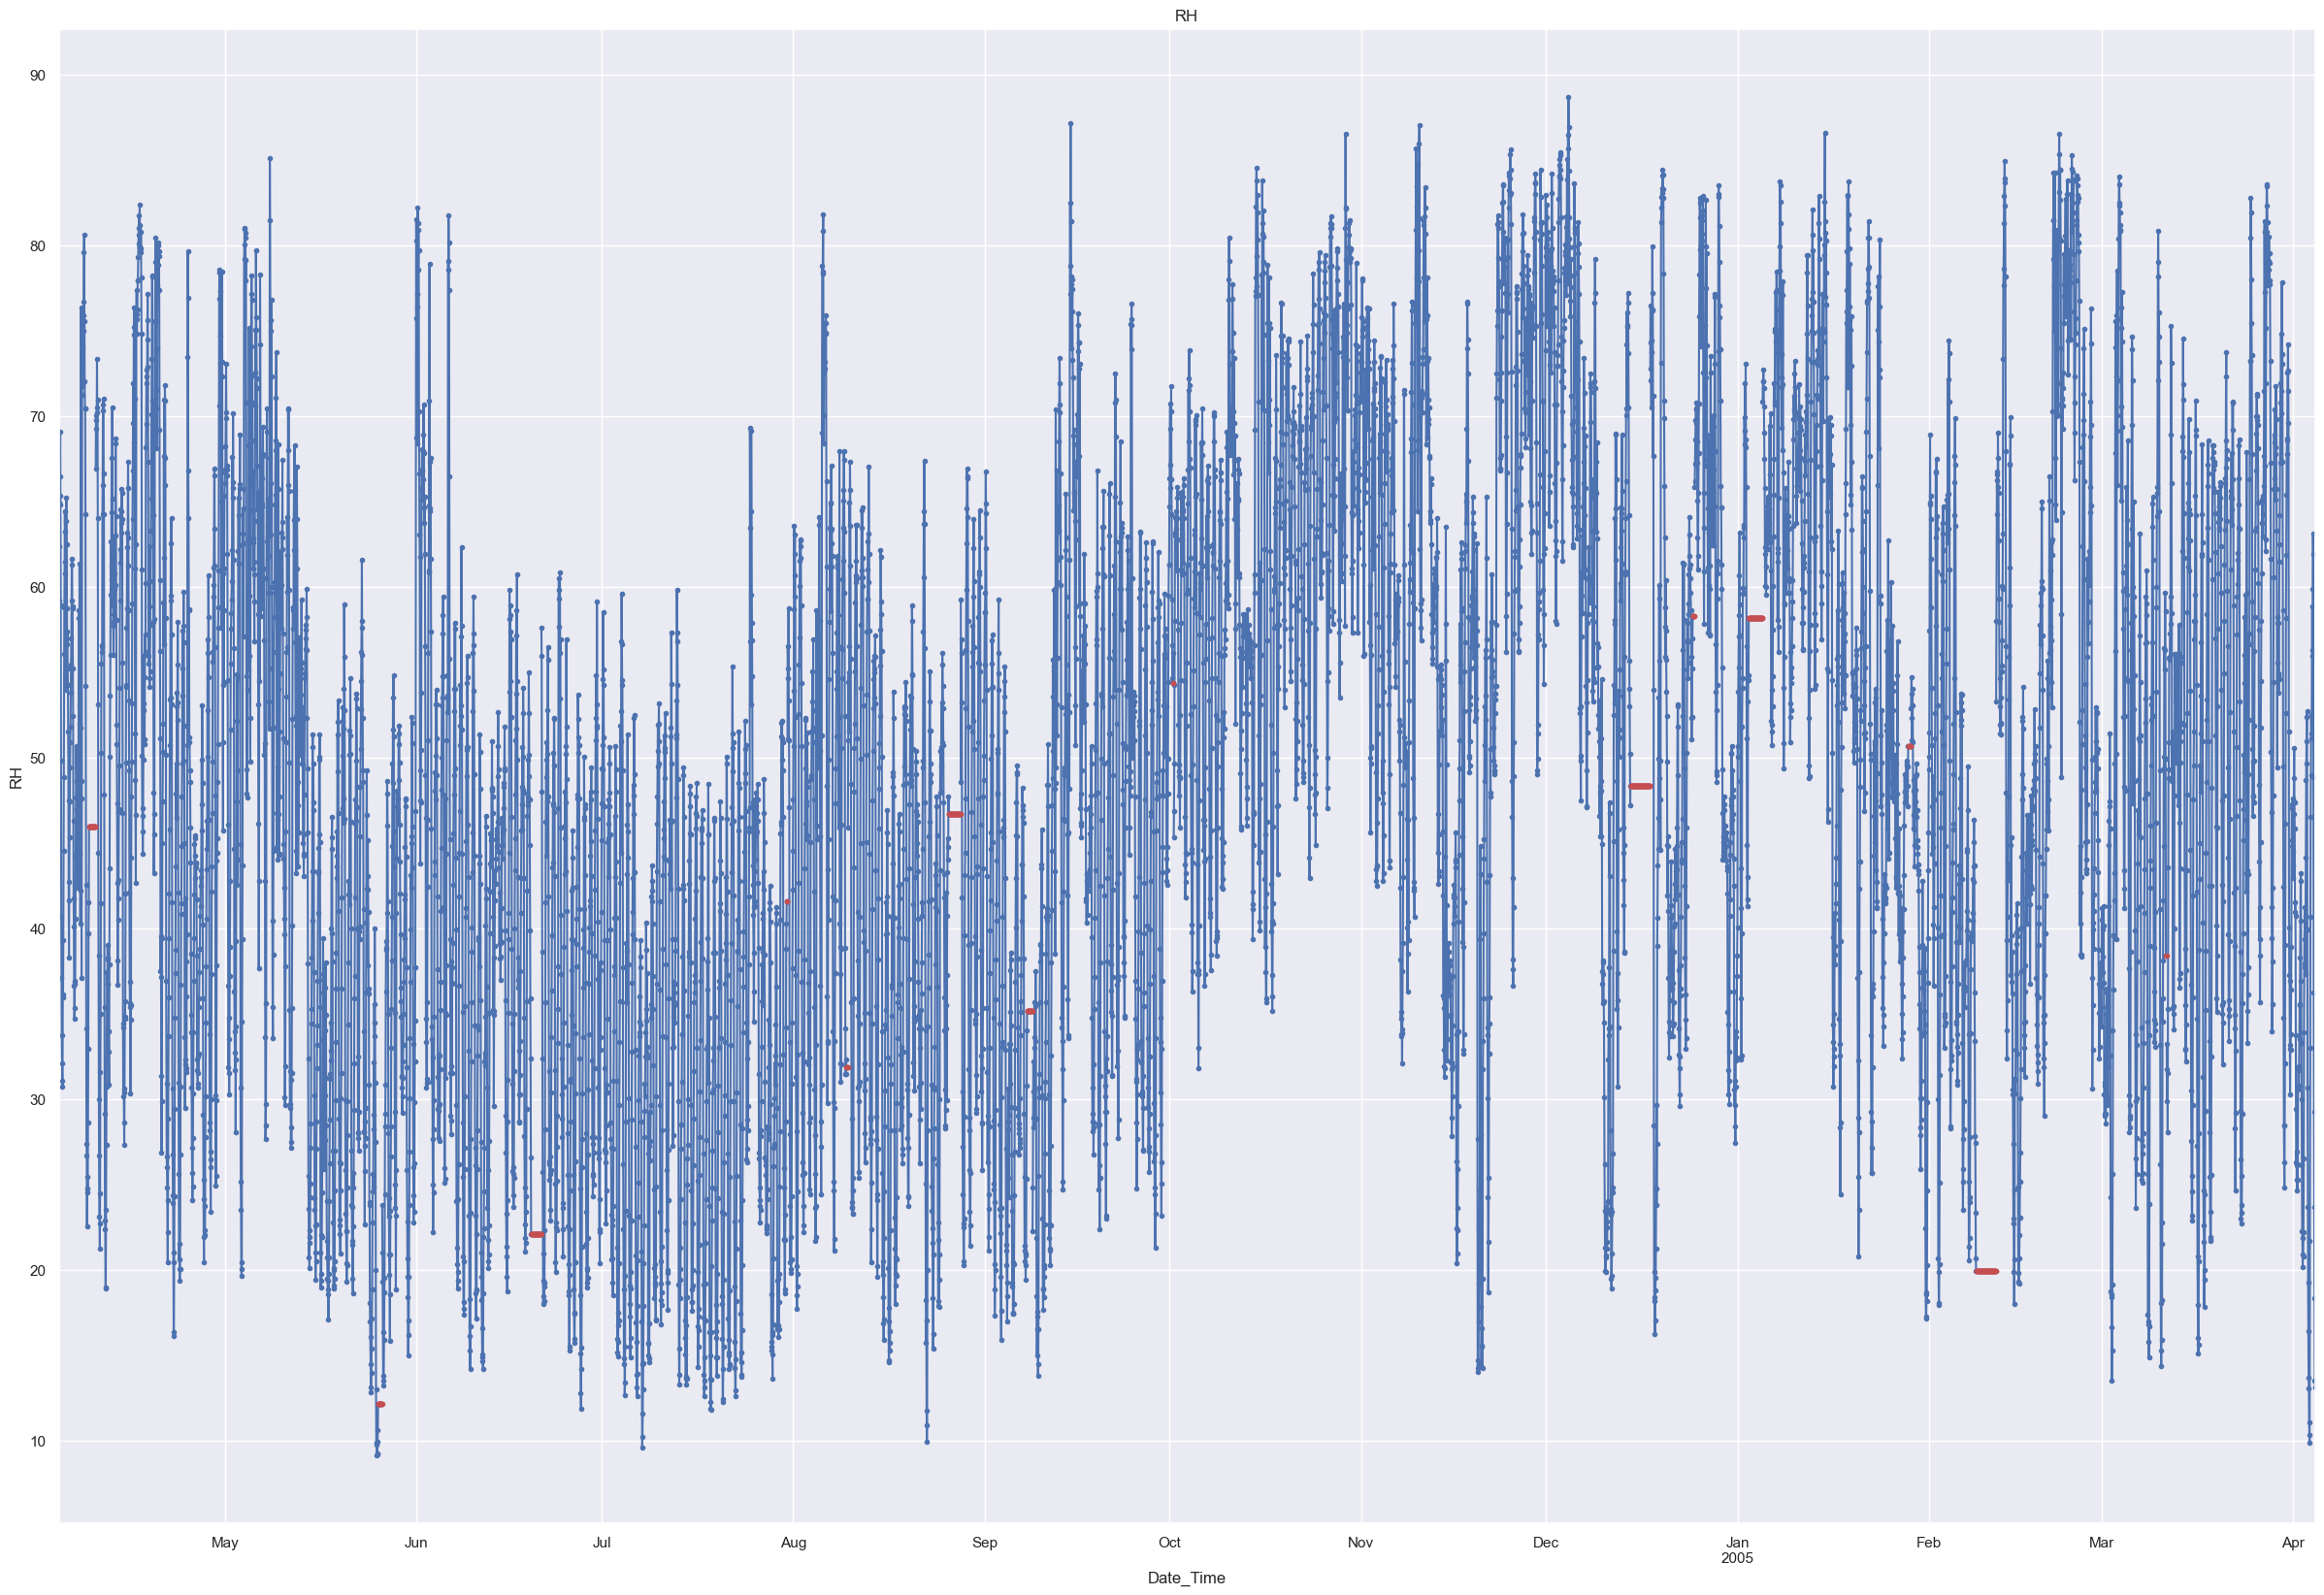

In [225]:

data_ = data.asfreq("1H")

# Apply the forward fill method.
data_imputed = data_.fillna(method="ffill")

# Plot the imputed time series.
for var in ["CO_Sensor", "RH"]:

    # plot the time series.
    ax = data_[var].plot(linestyle="-", marker=".", figsize=[30, 20])

    # plot the imputed values on top, in red.
    data_imputed[data_.isnull()][var].plot(ax=ax, legend=None, marker=".", color="r")

    # Add title.
    plt.title(var)

    # the y axis label
    plt.ylabel(var)

    plt.show()

In [159]:
time_ = data.index.time

time_ = pd.Series(time_, index=data.index)

time_.head()

Date_Time
2004-04-04 00:00:00    00:00:00
2004-04-04 01:00:00    01:00:00
2004-04-04 02:00:00    02:00:00
2004-04-04 03:00:00    03:00:00
2004-04-04 04:00:00    04:00:00
dtype: object

Text(0, 0.5, 'Concentration')

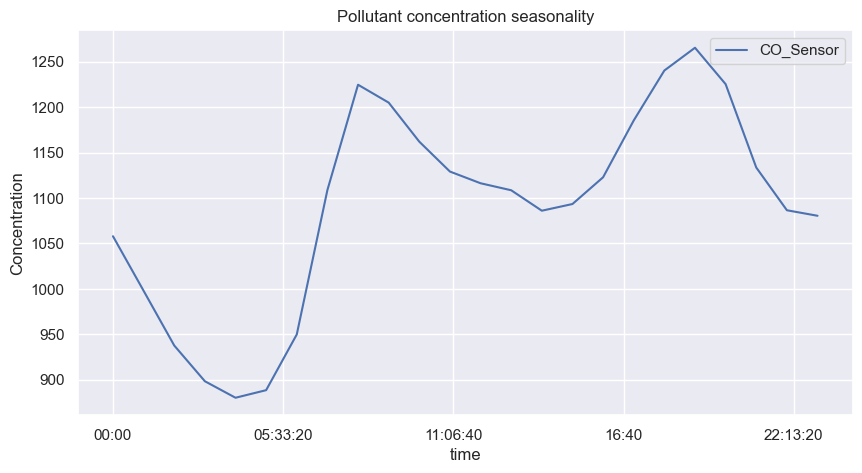

In [160]:
data.groupby(time_)[["CO_Sensor"]].mean().plot(figsize=(10, 5))
plt.title("Pollutant concentration seasonality")
plt.ylabel("Concentration")

Text(0, 0.5, 'Concentration')

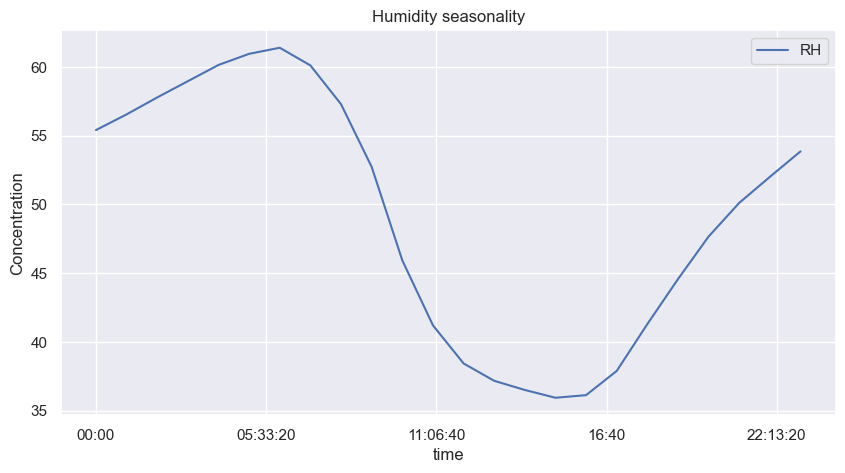

In [161]:
data.groupby(time_)[["RH"]].mean().plot(figsize=(10, 5))
plt.title("Humidity seasonality")
plt.ylabel("Concentration")

In [162]:
data['Month']=data.index.month
data['Day']=data.index.day
data['Week']=data.index.isocalendar().week
data['Day_of_Week']=data.index.day_of_week
data['Hour']=data.index.hour

data["is_weekend"]=np.where(data["Day_of_Week"]>4, 1, 0)

data.head()

CO_Sensor         RH  Month  Day  Week  Day_of_Week  \
Date_Time                                                                  
2004-04-04 00:00:00    1224.25  56.475000      4    4    14            6   
2004-04-04 01:00:00    1215.25  59.200000      4    4    14            6   
2004-04-04 02:00:00    1114.50  62.400001      4    4    14            6   
2004-04-04 03:00:00    1123.50  64.950002      4    4    14            6   
2004-04-04 04:00:00    1027.50  65.349998      4    4    14            6   

                     Hour  is_weekend  
Date_Time                              
2004-04-04 00:00:00     0           1  
2004-04-04 01:00:00     1           1  
2004-04-04 02:00:00     2           1  
2004-04-04 03:00:00     3           1  
2004-04-04 04:00:00     4           1

In [163]:
cyclical = CyclicalFeatures(
    variables=["Month", "Hour", "Day_of_Week", "Day", "Week"],  # The features we want to transform.
    drop_original=False,  # Whether to drop the original features.
)

data = cyclical.fit_transform(data)

In [164]:
data

CO_Sensor         RH  Month  Day  Week  Day_of_Week  \
Date_Time                                                                  
2004-04-04 00:00:00    1224.25  56.475000      4    4    14            6   
2004-04-04 01:00:00    1215.25  59.200000      4    4    14            6   
2004-04-04 02:00:00    1114.50  62.400001      4    4    14            6   
2004-04-04 03:00:00    1123.50  64.950002      4    4    14            6   
2004-04-04 04:00:00    1027.50  65.349998      4    4    14            6   
...                        ...        ...    ...  ...   ...          ...   
2005-04-04 10:00:00    1314.25  29.250000      4    4    14            0   
2005-04-04 11:00:00    1162.50  23.725000      4    4    14            0   
2005-04-04 12:00:00    1142.00  18.350000      4    4    14            0   
2005-04-04 13:00:00    1002.50  13.550000      4    4    14            0   
2005-04-04 14:00:00    1070.75  13.125000      4    4    14            0   

                     Hour  is_weekend  Month_sin  Month_cos  Hour_sin  \
Date_Time                                                               
2004-04-04 00:00:00     0           1   0.866025       -0.5  0.000000   
2004-04-04 01:00:00     1           1   0.866025       -0.5  0.269797   
2004-04-04 02:00:00     2           1   0.866025       -0.5  0.519584   
2004-04-04 03:00:00     3           1   0.866025       -0.5  0.730836   
2004-04-04 04:00:00     4           1   0.866025       -0.5  0.887885   
...                   ...         ...        ...        ...       ...   
2005-04-04 10:00:00    10           0   0.866025       -0.5  0.398401   
2005-04-04 11:00:00    11           0   0.866025       -0.5  0.136167   
2005-04-04 12:00:00    12           0   0.866025       -0.5 -0.136167   
2005-04-04 13:00:00    13           0   0.866025       -0.5 -0.398401   
2005-04-04 14:00:00    14           0   0.866025       -0.5 -0.631088   

                     Hour_cos  Day_of_Week_sin  Day_of_Week_cos   Day_sin  \
Date_Time                                                                   
2004-04-04 00:00:00  1.000000    -2.449294e-16              1.0  0.724793   
2004-04-04 01:00:00  0.962917    -2.449294e-16              1.0  0.724793   
2004-04-04 02:00:00  0.854419    -2.449294e-16              1.0  0.724793   
2004-04-04 03:00:00  0.682553    -2.449294e-16              1.0  0.724793   
2004-04-04 04:00:00  0.460065    -2.449294e-16              1.0  0.724793   
...                       ...              ...              ...       ...   
2005-04-04 10:00:00 -0.917211     0.000000e+00              1.0  0.724793   
2005-04-04 11:00:00 -0.990686     0.000000e+00              1.0  0.724793   
2005-04-04 12:00:00 -0.990686     0.000000e+00              1.0  0.724793   
2005-04-04 13:00:00 -0.917211     0.000000e+00              1.0  0.724793   
2005-04-04 14:00:00 -0.775711     0.000000e+00              1.0  0.724793   

                      Day_cos  Week_sin  Week_cos  
Date_Time                                          
2004-04-04 00:00:00  0.688967   0.99605 -0.088796  
2004-04-04 01:00:00  0.688967   0.99605 -0.088796  
2004-04-04 02:00:00  0.688967   0.99605 -0.088796  
2004-04-04 03:00:00  0.688967   0.99605 -0.088796  
2004-04-04 04:00:00  0.688967   0.99605 -0.088796  
...                       ...       ...       ...  
2005-04-04 10:00:00  0.688967   0.99605 -0.088796  
2005-04-04 11:00:00  0.688967   0.99605 -0.088796  
2005-04-04 12:00:00  0.688967   0.99605 -0.088796  
2005-04-04 13:00:00  0.688967   0.99605 -0.088796  
2005-04-04 14:00:00  0.688967   0.99605 -0.088796  

[8412 rows x 18 columns]

In [165]:
data.isna().sum()

CO_Sensor          0
RH                 0
Month              0
Day                0
Week               0
Day_of_Week        0
Hour               0
is_weekend         0
Month_sin          0
Month_cos          0
Hour_sin           0
Hour_cos           0
Day_of_Week_sin    0
Day_of_Week_cos    0
Day_sin            0
Day_cos            0
Week_sin           0
Week_cos           0
dtype: int64

In [166]:
variables = ["CO_Sensor", "RH"]

# Shift the data forward 1 Hr.
tmp = data[variables].shift(freq="1H")

# Names for the new variables.
tmp.columns = [v + "_lag_1" for v in variables]

# Add the variables to the original data.
print("data size before")
print(data.shape)

data = data.merge(tmp, left_index=True, right_index=True, how="left")

print("data size after")
print(data.shape)

data.head()

data size before
(8412, 18)
data size after
(8412, 20)


CO_Sensor         RH  Month  Day  Week  Day_of_Week  \
Date_Time                                                                  
2004-04-04 00:00:00    1224.25  56.475000      4    4    14            6   
2004-04-04 01:00:00    1215.25  59.200000      4    4    14            6   
2004-04-04 02:00:00    1114.50  62.400001      4    4    14            6   
2004-04-04 03:00:00    1123.50  64.950002      4    4    14            6   
2004-04-04 04:00:00    1027.50  65.349998      4    4    14            6   

                     Hour  is_weekend  Month_sin  Month_cos  Hour_sin  \
Date_Time                                                               
2004-04-04 00:00:00     0           1   0.866025       -0.5  0.000000   
2004-04-04 01:00:00     1           1   0.866025       -0.5  0.269797   
2004-04-04 02:00:00     2           1   0.866025       -0.5  0.519584   
2004-04-04 03:00:00     3           1   0.866025       -0.5  0.730836   
2004-04-04 04:00:00     4           1   0.866025       -0.5  0.887885   

                     Hour_cos  Day_of_Week_sin  Day_of_Week_cos   Day_sin  \
Date_Time                                                                   
2004-04-04 00:00:00  1.000000    -2.449294e-16              1.0  0.724793   
2004-04-04 01:00:00  0.962917    -2.449294e-16              1.0  0.724793   
2004-04-04 02:00:00  0.854419    -2.449294e-16              1.0  0.724793   
2004-04-04 03:00:00  0.682553    -2.449294e-16              1.0  0.724793   
2004-04-04 04:00:00  0.460065    -2.449294e-16              1.0  0.724793   

                      Day_cos  Week_sin  Week_cos  CO_Sensor_lag_1   RH_lag_1  
Date_Time                                                                      
2004-04-04 00:00:00  0.688967   0.99605 -0.088796              NaN        NaN  
2004-04-04 01:00:00  0.688967   0.99605 -0.088796          1224.25  56.475000  
2004-04-04 02:00:00  0.688967   0.99605 -0.088796          1215.25  59.200000  
2004-04-04 03:00:00  0.688967   0.99605 -0.088796          1114.50  62.400001  
2004-04-04 04:00:00  0.688967   0.99605 -0.088796          1123.50  64.950002

In [167]:
# Use the mean of the 3 previous hours as input variables.

tmp = (
    data[variables]
    .rolling(window="3H")
    .mean()  # Average the last 3 hr values.
    .shift(freq="1H")  # Move the average 1 hour forward
)

# Rename the columns
tmp.columns = [v + "_window" for v in variables]


# view of the result
tmp

CO_Sensor_window  RH_window
Date_Time                                       
2004-04-04 01:00:00       1224.250000  56.475000
2004-04-04 02:00:00       1219.750000  57.837500
2004-04-04 03:00:00       1184.666667  59.358334
2004-04-04 04:00:00       1151.083333  62.183334
2004-04-04 05:00:00       1088.500000  64.233334
...                               ...        ...
2005-04-04 11:00:00       1352.250000  38.133334
2005-04-04 12:00:00       1257.750000  29.750000
2005-04-04 13:00:00       1206.250000  23.775000
2005-04-04 14:00:00       1102.333333  18.541667
2005-04-04 15:00:00       1071.750000  15.008333

[8412 rows x 2 columns]

In [168]:
data['CO_Sensor_window']=tmp['CO_Sensor_window']
data['RH_window']=tmp['RH_window']
data.dropna(inplace=True)
data

CO_Sensor         RH  Month  Day  Week  Day_of_Week  \
Date_Time                                                                  
2004-04-04 01:00:00    1215.25  59.200000      4    4    14            6   
2004-04-04 02:00:00    1114.50  62.400001      4    4    14            6   
2004-04-04 03:00:00    1123.50  64.950002      4    4    14            6   
2004-04-04 04:00:00    1027.50  65.349998      4    4    14            6   
2004-04-04 05:00:00    1009.50  66.499998      4    4    14            6   
...                        ...        ...    ...  ...   ...          ...   
2005-04-04 10:00:00    1314.25  29.250000      4    4    14            0   
2005-04-04 11:00:00    1162.50  23.725000      4    4    14            0   
2005-04-04 12:00:00    1142.00  18.350000      4    4    14            0   
2005-04-04 13:00:00    1002.50  13.550000      4    4    14            0   
2005-04-04 14:00:00    1070.75  13.125000      4    4    14            0   

                     Hour  is_weekend  Month_sin  Month_cos  ...  \
Date_Time                                                    ...   
2004-04-04 01:00:00     1           1   0.866025       -0.5  ...   
2004-04-04 02:00:00     2           1   0.866025       -0.5  ...   
2004-04-04 03:00:00     3           1   0.866025       -0.5  ...   
2004-04-04 04:00:00     4           1   0.866025       -0.5  ...   
2004-04-04 05:00:00     5           1   0.866025       -0.5  ...   
...                   ...         ...        ...        ...  ...   
2005-04-04 10:00:00    10           0   0.866025       -0.5  ...   
2005-04-04 11:00:00    11           0   0.866025       -0.5  ...   
2005-04-04 12:00:00    12           0   0.866025       -0.5  ...   
2005-04-04 13:00:00    13           0   0.866025       -0.5  ...   
2005-04-04 14:00:00    14           0   0.866025       -0.5  ...   

                     Day_of_Week_sin  Day_of_Week_cos   Day_sin   Day_cos  \
Date_Time                                                                   
2004-04-04 01:00:00    -2.449294e-16              1.0  0.724793  0.688967   
2004-04-04 02:00:00    -2.449294e-16              1.0  0.724793  0.688967   
2004-04-04 03:00:00    -2.449294e-16              1.0  0.724793  0.688967   
2004-04-04 04:00:00    -2.449294e-16              1.0  0.724793  0.688967   
2004-04-04 05:00:00    -2.449294e-16              1.0  0.724793  0.688967   
...                              ...              ...       ...       ...   
2005-04-04 10:00:00     0.000000e+00              1.0  0.724793  0.688967   
2005-04-04 11:00:00     0.000000e+00              1.0  0.724793  0.688967   
2005-04-04 12:00:00     0.000000e+00              1.0  0.724793  0.688967   
2005-04-04 13:00:00     0.000000e+00              1.0  0.724793  0.688967   
2005-04-04 14:00:00     0.000000e+00              1.0  0.724793  0.688967   

                     Week_sin  Week_cos  CO_Sensor_lag_1   RH_lag_1  \
Date_Time                                                             
2004-04-04 01:00:00   0.99605 -0.088796          1224.25  56.475000   
2004-04-04 02:00:00   0.99605 -0.088796          1215.25  59.200000   
2004-04-04 03:00:00   0.99605 -0.088796          1114.50  62.400001   
2004-04-04 04:00:00   0.99605 -0.088796          1123.50  64.950002   
2004-04-04 05:00:00   0.99605 -0.088796          1027.50  65.349998   
...                       ...       ...              ...        ...   
2005-04-04 10:00:00   0.99605 -0.088796          1296.50  36.275001   
2005-04-04 11:00:00   0.99605 -0.088796          1314.25  29.250000   
2005-04-04 12:00:00   0.99605 -0.088796          1162.50  23.725000   
2005-04-04 13:00:00   0.99605 -0.088796          1142.00  18.350000   
2005-04-04 14:00:00   0.99605 -0.088796          1002.50  13.550000   

                     CO_Sensor_window  RH_window  
Date_Time                                         
2004-04-04 01:00:00       1224.250000  56.475000  
2004-04-04 02:00:00       1219.750000  57.837500  
2004-04-04 03:00:

In [169]:
X_train = data[data.index <= "2005-03-04"]
X_test = data[data.index > "2005-03-04"]

X_train.shape, X_test.shape

((7640, 22), (756, 22))

In [170]:
# the target variable
y_train = X_train["CO_Sensor"].copy()
y_test = X_test["CO_Sensor"].copy()

# remove raw time series from predictors set
X_train = X_train.drop("CO_Sensor", axis=1)
X_test = X_test.drop("CO_Sensor", axis=1)

In [171]:
print("train rmse: ", mean_squared_error(
    y_train, X_train["CO_Sensor_lag_1"], squared=False,))

print("test rmse: ",  mean_squared_error(
    y_test, X_test["CO_Sensor_lag_1"], squared=False,))

train rmse:  101.0530116559605
test rmse:  104.03693729499382


In [204]:
# Define the model with GridSearchCV for hyperparameter tuning
model = RandomForestRegressor()

# Define the grid of parameters to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': np.arange(5, 14)
}

# Apply GridSearchCV to the pipeline
grid_search = HalvingGridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Train the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters: ", best_params)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 282
max_resources_: 7640
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 27
n_resources: 282
Fitting 5 folds for each of 27 candidates, totalling 135 fits
----------
iter: 1
n_candidates: 9
n_resources: 846
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------
iter: 2
n_candidates: 3
n_resources: 2538
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 3
n_candidates: 1
n_resources: 7614
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters:  {'max_depth': 11, 'n_estimators': 200}


In [205]:
print("For Training Data:")

# Make predictions on the test data
y_pred_train = grid_search.predict(X_train)

# Evaluate the model
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_train=mean_squared_error(y_train, y_pred_train)

print("Mean Absolute Error: ", mae_train)
print("R2 Score: ", r2_train)
print("Mean Squared Error: ", mse_train)

print("For Test Data:")

# Make predictions on the test data
y_pred_test = grid_search.predict(X_test)

# Evaluate the model
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mse_test=mean_squared_error(y_test, y_pred_test)

print("Mean Absolute Error: ", mae_test)
print("R2 Score: ", r2_test)
print("Mean Squared Error: ", mse_test)

For Training Data:
Mean Absolute Error:  34.49912521345809
R2 Score:  0.9548840370952985
Mean Squared Error:  2060.2918486599165
For Test Data:
Mean Absolute Error:  58.320617630045675
R2 Score:  0.8298609000912583
Mean Squared Error:  6489.576766843807


In [174]:
# Define the model
model = Pipeline(steps=[
                        ('regressor', LinearRegression())])

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('regressor', LinearRegression())])

In [175]:
print("For Training Data:")

# Make predictions on the test data
y_pred_train = model.predict(X_train)

# Evaluate the model
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_train=mean_squared_error(y_train, y_pred_train)

print("Mean Absolute Error: ", mae_train)
print("R2 Score: ", r2_train)
print("Mean Squared Error: ", mse_train)

print("For Test Data:")

# Make predictions on the test data
y_pred_test = model.predict(X_test)

# Evaluate the model
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mse_test=mean_squared_error(y_test, y_pred_test)

print("Mean Absolute Error: ", mae_test)
print("R2 Score: ", r2_test)
print("Mean Squared Error: ", mse_test)

For Training Data:
Mean Absolute Error:  62.760187538495416
R2 Score:  0.831733884003229
Mean Squared Error:  7684.138492756943
For Test Data:
Mean Absolute Error:  61.103753039250215
R2 Score:  0.7931928487068205
Mean Squared Error:  7888.197862626716


In [176]:
from sklearn.linear_model import Lasso

linear_model = Lasso(alpha=100, random_state=0)

linear_model.fit(X_train, y_train)

Lasso(alpha=100, random_state=0)

In [177]:
print("For Training Data:")

# Make predictions on the test data
y_pred_train = linear_model.predict(X_train)

# Evaluate the model
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_train=mean_squared_error(y_train, y_pred_train)

print("Mean Absolute Error: ", mae_train)
print("R2 Score: ", r2_train)
print("Mean Squared Error: ", mse_train)

print("For Test Data:")

# Make predictions on the test data
y_pred_test = linear_model.predict(X_test)

# Evaluate the model
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mse_test=mean_squared_error(y_test, y_pred_test)

print("Mean Absolute Error: ", mae_test)
print("R2 Score: ", r2_test)
print("Mean Squared Error: ", mse_test)

For Training Data:
Mean Absolute Error:  68.31682916749963
R2 Score:  0.8050197414072513
Mean Squared Error:  8904.082093444144
For Test Data:
Mean Absolute Error:  66.42907288383176
R2 Score:  0.7588069072806745
Mean Squared Error:  9199.772960325376


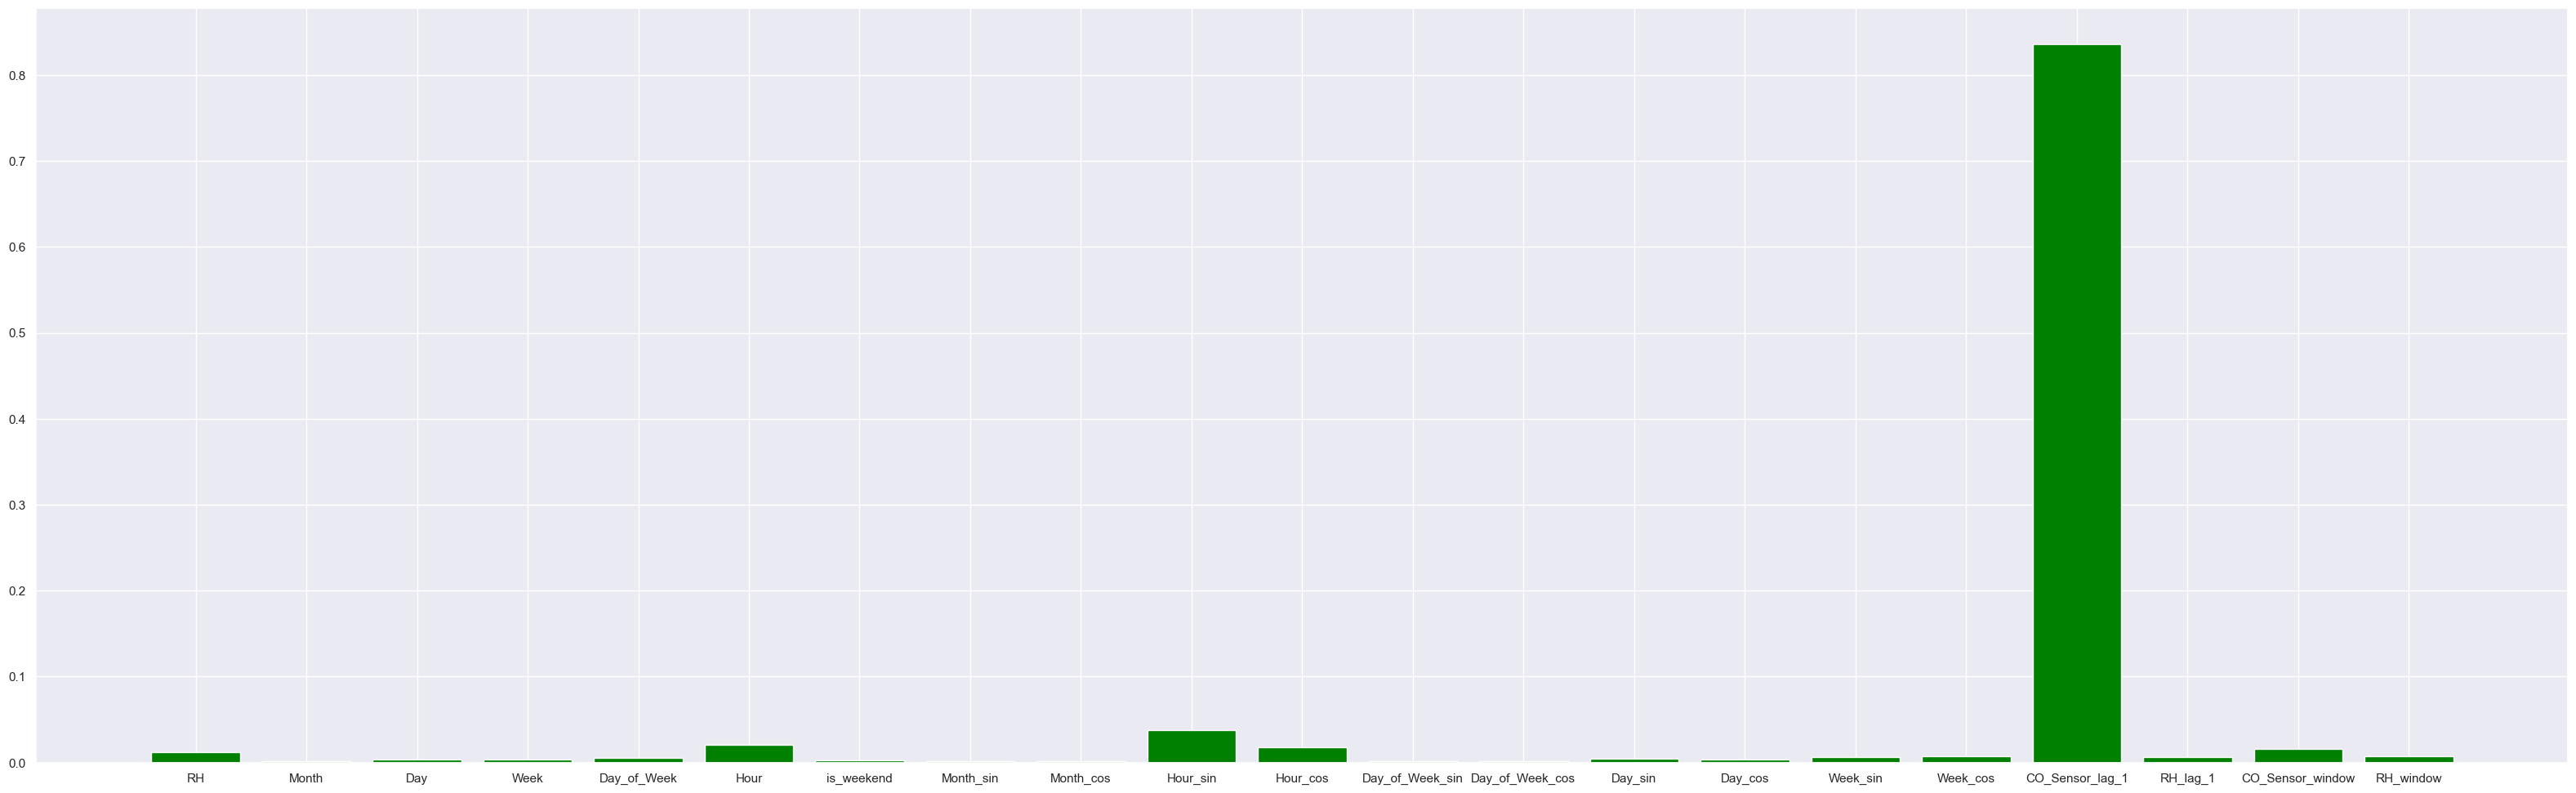

In [229]:
rf_best = grid_search.best_estimator_

imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

plt.figure(figsize=(40,12))

plt.bar(imp_df['Varname'], imp_df['Imp'], color='green')
plt.show()

In [224]:
imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
17   CO_Sensor_lag_1  0.836332
9           Hour_sin  0.037665
5               Hour  0.020977
10          Hour_cos  0.017944
19  CO_Sensor_window  0.015968
0                 RH  0.012245
20         RH_window  0.007015
16          Week_cos  0.006890
18          RH_lag_1  0.006789
15          Week_sin  0.005936
4        Day_of_Week  0.005359
13           Day_sin  0.004837
2                Day  0.003952
14           Day_cos  0.003865
3               Week  0.003634
6         is_weekend  0.002613
12   Day_of_Week_cos  0.001974
8          Month_cos  0.001821
1              Month  0.001458
11   Day_of_Week_sin  0.001380
7          Month_sin  0.001343

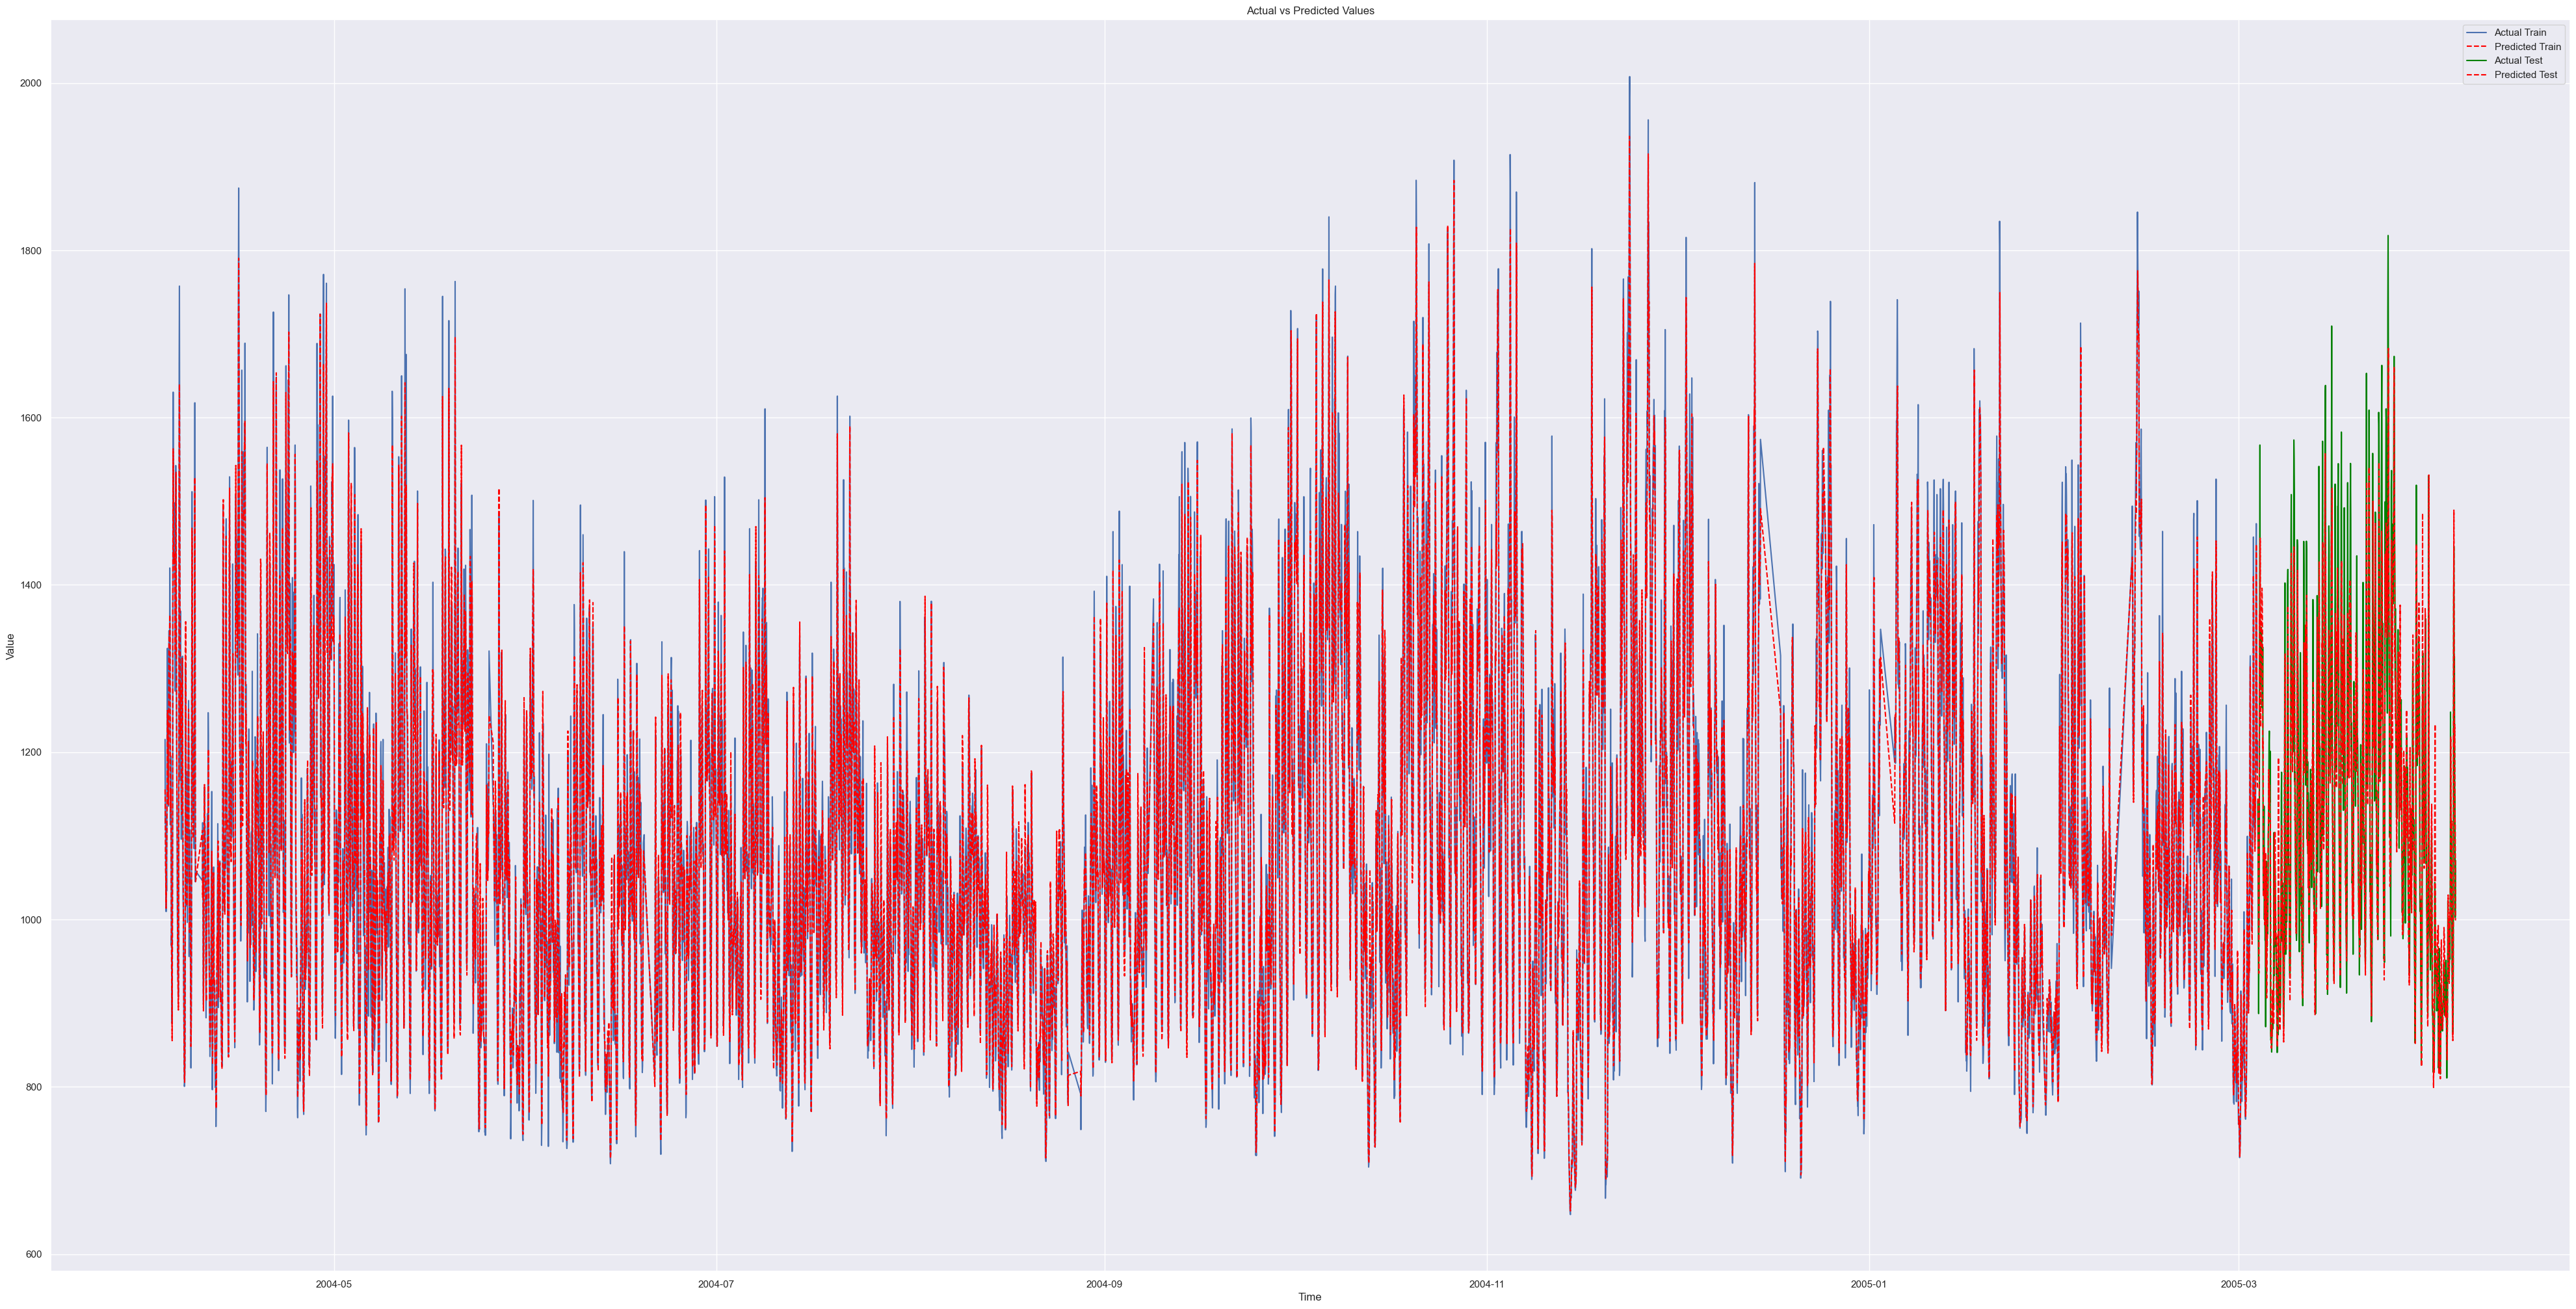

In [207]:
plt.figure(figsize=(50, 25))  # Set the figure size
plt.plot(y_train.index, y_train, label='Actual Train')  # Plot the actual values
plt.plot(y_train.index, y_pred_train, label='Predicted Train', linestyle='--', color='red')  # Plot the predicted values
plt.plot(y_test.index, y_test, label='Actual Test', color='green')  # Plot the actual values
plt.plot(y_test.index, y_pred_test, label='Predicted Test', linestyle='--', color='red')  # Plot the predicted values
plt.xlabel('Time')  # Label x-axis
plt.ylabel('Value')  # Label y-axis
plt.title('Actual vs Predicted Values')  # Title of the plot
plt.legend()  # Add a legend
plt.show()  # Display the plot